In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

In [2]:
df=pd.read_csv('imdb.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.dropna(inplace=True)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
texts = df['review'].astype(str).tolist()
labels = df['sentiment'].tolist()

In [6]:
t=Tokenizer(num_words=10000, oov_token='<OOV>')
t.fit_on_texts(texts)
sequences=t.texts_to_sequences(texts)

In [7]:
pad=pad_sequences(sequences,maxlen=256)

In [8]:
import numpy as np

X = np.array(pad)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=32,),#input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history=model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6975 - loss: 0.5223 - val_accuracy: 0.8884 - val_loss: 0.2737
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9540 - loss: 0.1338 - val_accuracy: 0.8710 - val_loss: 0.3477
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9939 - loss: 0.0231 - val_accuracy: 0.8662 - val_loss: 0.4880
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9986 - loss: 0.0057 - val_accuracy: 0.8660 - val_loss: 0.6737
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9999 - loss: 7.2136e-04 - val_accuracy: 0.8714 - val_loss: 0.7501


In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.2f}")
print(f"📉 Test Loss: {loss:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8742 - loss: 0.6964

✅ Test Accuracy: 0.88
📉 Test Loss: 0.68


In [14]:
new_review = ["This movie was fantastic!"]
seq = t.texts_to_sequences(new_review)
padded_seq = pad_sequences(seq, maxlen=256)
prediction = model.predict(padded_seq)[0][0]

if prediction >= 0.5:
    print(f"😊 Positive review (Confidence: {prediction:.2f})")
else:
    print(f"😞 Negative review (Confidence: {1 - prediction:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
😊 Positive review (Confidence: 0.93)


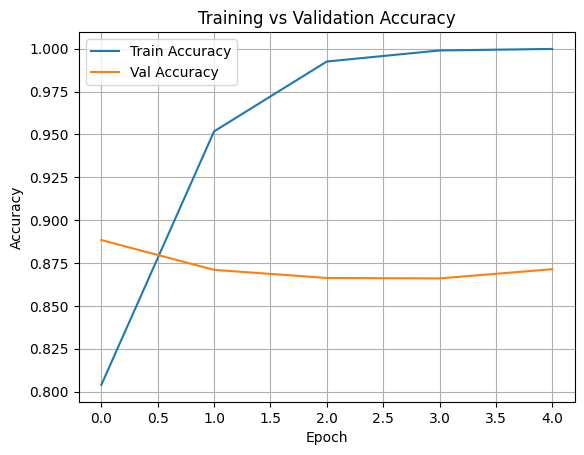

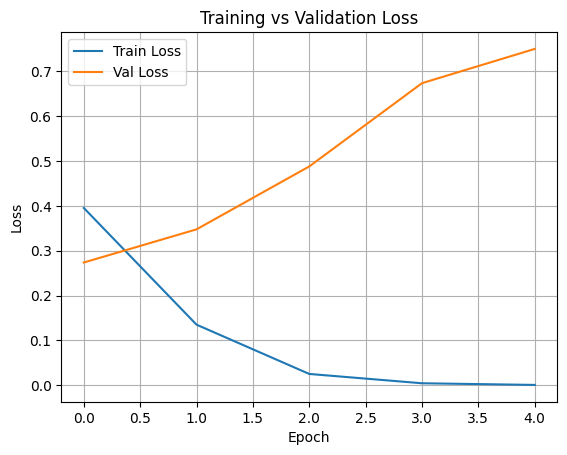

In [15]:
import matplotlib.pyplot as plt

# Accuracy & Loss in one go
metrics = ['accuracy', 'loss']
titles = ['Accuracy', 'Loss']

for metric, title in zip(metrics, titles):
    plt.plot(history.history[metric], label=f'Train {title}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {title}')
    plt.title(f'Training vs Validation {title}')
    plt.xlabel('Epoch')
    plt.ylabel(title)
    plt.legend()
    plt.grid(True)
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


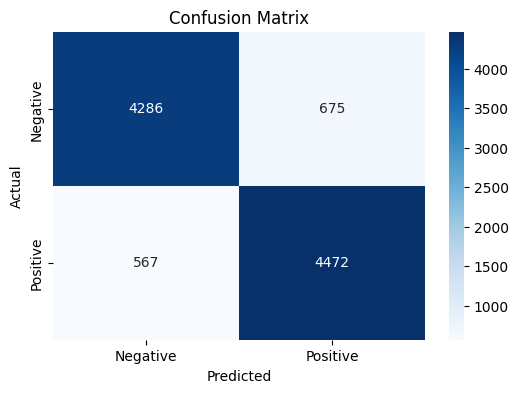

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()